# Project 1 - Arctic ice maps

**Project deadline:** This project is due for submission on **Thursday, 15.05.2025, 11:55pm**. Please check carefully the *About the Projects* section below for further details.

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignments, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We aim to hand-out six projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The project needs to be submitted by uploading this notebook to [Projects/Project 1](https://ecampus.uni-bonn.de/goto_ecampus_exc_3381147.html) on eCampus. You do not need to modify the notebooks name before your upload. Your project must be on eCampus by Thursday, 15.05.2025, 11:55pm. **No late uploads can be accepted!**
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you need to be able to explain your solution in detail to your tutor and/or the lecturers! We might ask you for an interview about your project if the solution is (close to) identical to another students submission.**

**Note:** The tutors, Matthias and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!

**Important remarks:** (1) Your notebook will be tested and graded from a *clean* state `(Kernel -> Reset Kernel and clear all Outputs)`. Please make sure that it cleanly runs from *top to bottom*!; (2) Your notebook will be graded on our JupyterLab system! Your grade is solely based on the results obtained on our setup! Please note in particular that all modules you use are available on our system and that you remove all hardwired paths to directories outside the eCampus file system. 

## Task 0 - Strings

We did not yet cover explicitely the string container in class. YOu need to handle strings in this project. If you do not yet know strings, you can either look them up on the Web or watch the following video. The video covers strings on the basis  of your `numpy`-knowledge on a beginners level.

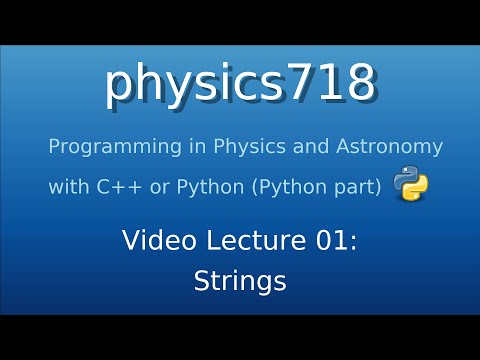

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('OsQ28kHjLj0', width=400, height=200)

## Introduction

The purpose of this project is to become familiar with working on image data, plotting it, and combining it in various ways for analysis. 

The data used in this problem set was/is collected by two different satellite missions. Involved are the AMSR-E instrument on the [Aqua](http://en.wikipedia.org/wiki/Aqua_%28satellite%29) satellite (data from 2002 to 2011) and the AMSR2 instrument on the [GCOM-W](https://suzaku.eorc.jaxa.jp/GCOM_W/) satellite (data from 2013 to-date). The data consist of maps of the concentration of ice in the Arctic collected between 2002 and 2023 with the exception of 2012. All the data were already downloaded and transformed for you to an easy-to-use format from [here](https://seaice.uni-bremen.de/start/data-archive/). One of the main issues to work on scientific data with Python is to first read them from various formats into `numpy`-arrays. We will come back to it in class but you do not need to worry about it here.

The data you should use are in the directory `/home/share/Project_2/ice_data` within our online-system. This is actually a (small) subset of the complete satellite data set, with only two ice maps every month (some are missing though). You should explore yourself the original data if you are interested to work with the full data set. I am very happy to help you with that! Although we only work with a small subset of available ice-maps, we would like to ask you *not* to copy them to your private space within our system but to work with them at their current location. We would like to avoid multiplying 400MB more than 100 times! If you would like to use the data on your own computer, there is a `tar`-archive at `/home/share/Project_2/ice_data_2025.tgz`.

The data is in `numpy` format, which means that you can read it as a `numpy`-array using:

    >>> import numpy as np
    >>> data = np.load('/home/share/Project_2/ice_data/20080415.npy')

which will give you a 2-d array. Just for information, this was created with:

    >>> np.save('ice_data/20080415.npy', data)
    
where `data` was a 2-d `numpy`-array that was extracted from the original data set.

**Note:** There is an ice-map for each first and each 15th of a month from the years 2003-2011 and 2013-2024 (a small amount of data is missing). For instance, the file `20080415.npy` represents data for the 15th of April 2008.

## Task 1 - getting familiar with the data and examining a single map

### (10% of project mark)

**Please put the solution of this and the other tasks at the end of this notebook! You will submit the modified notebook to eCampus.**

Start off by reading in some  map as shown above, and plot it with Matplotlib (look up the `ax.imshow`-function). Note that to get the correct orientation, you will need to call the ``imshow`` command with the ``origin='lower'`` option, which ensures that the (0,0) pixels is on the bottom left, not the top left. You can try and use different colormaps if you like (set by the ``cmap`` option) - see [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html) (scroll down on the page) for information on the available colormaps. You can specify a colormap to use with e.g. ``cmap=plt.cm.jet`` (i.e. ``cmap=plt.cm.`` followed by the name of the colormap). Note that you can make figures larger by specifying an explicit `figsize` in `plt.subplots`:

    >>> fig, ax = plt.subplots(figsize=(8,8))

where the size is given in inches. Try and find a way to plot a colorbar on the side, to show what color corresponds to what value. Remember that you can always look at the [Matplotlib Gallery](https://matplotlib.org/stable/gallery/index.html) to find example plots for each `matplotlib`-feature. You can also try and remove the tick labels (``100``, ``200``, etc.) since they are not useful - but don't worry if you can't figure out how.

**Remarks:** (1) When you explore the data-values, you will notice that they contain numbers from 0 to 100. A value of 50 means that 50% of the area occupied by the corresponding pixel are covered with ice. A value of zero means that the complete pixel is covered with water; (2) Besides the numbers, a good deal of the pixels contains the special value `nan` (not a number). These are areas covered by land. Functions like `imshow` automatically ignore these values and do not produce an error. If you intend to do numerical calculations (`numpy`) with pixels that have a `nan`-value, the result is `nan` again by default. To ignore `nan`-values for building sums etc., you would need to use functions as `np.nansum` instead of `np.sum` etc.

I show below the result I obtain for this step (one winter and one summer map).


<img src="figs/ice_winter_summer.png" style="height: 300px;">

## Task 2 - reading in and examining multiple maps 

### (50% of project mark)

We now want to make a plot of the ice concentration over time. Reading in a single map is easy, but since we have more than 350 maps, we do not want to read them all in individually by hand. Write a loop over all the available files, and inside the loop, read in the data to a variable (e.g. ``data``), and also extract the year, month, and day as integer values (e.g. ``year``, ``month``, and ``day``) from the filename. Then, also inside the loop, construct an array ``times`` which is essentially the fractional time in years. You can assume for simplicity that each month has 30 days and each year has 360 days - this will not affect the results later. As an example, in the year 2003, you would put the 1st of January as $2003.00$, the 2nd of January as $2003 + \frac{1}{360}\approx 2003.033$ and the 1st of February as $2003 + \frac{1}{12}\approx 2003.083$ into the `times`-array. Finally, also compute for each file the total number of pixels that have a value above 50% ice. Put also those values into an array. After the loop, make a plot of the number of pixels with a concentration above 50% against time.

**Hint:** To loop over files, you can use the`glob`-module. An example is shown in the following code cell: 

In [2]:
# The glob-module allows you to use Linux style
# pathname expansion
import glob
import numpy as np

# generate a list of files matching the Unix-pattern
# /home/share/Project_2/ice_data/2*. These are all
# necessary ice-data files for the project:

# The students should define their data location here and
# use it throughout. You can subtract points if hardwired
# paths are all over the place!
datapath = "/home/share/Project_2/ice_data"
filelist = np.sort(glob.glob(f"{datapath}/2*"))

# print the first ten files:
print(filelist[:10])


['/home/share/Project_2/ice_data/20030101.npy'
 '/home/share/Project_2/ice_data/20030115.npy'
 '/home/share/Project_2/ice_data/20030201.npy'
 '/home/share/Project_2/ice_data/20030215.npy'
 '/home/share/Project_2/ice_data/20030301.npy'
 '/home/share/Project_2/ice_data/20030315.npy'
 '/home/share/Project_2/ice_data/20030401.npy'
 '/home/share/Project_2/ice_data/20030415.npy'
 '/home/share/Project_2/ice_data/20030501.npy'
 '/home/share/Project_2/ice_data/20030515.npy']


We now want something a little more quantitative than just the number of pixels, so we will try and compute the area where the ice concentration is above a given threshold. However, we first need to know the area of the pixels in the image, and since we are looking at a projection of a spherical surface, each pixel will be a different area. The areas (in km$^{2}$) are contained inside the file named ``ice_data_area.npy`` (within the `/home/share/Project_2` directory). Read in the areas and make a plot (with colorbar) to see how the pixel area is changing over the image.

Now, loop over the files again as before, but this time, for each file, compute the total area where the concentration of ice is 99% or above. Make a new plot showing the area of >99% ice concentration against time. Also plot the *total area* covered by ice as a function of time.

Describe what you see - how does the minimum value within each year change over time?

## Task 3 - visualizing changes over time; does the amount of ice decrease?

### (40% of project mark)

In the following we always work with the *total area* covered by ice from the previous task. 

Find the date at which the area of the region covered with ice is the smallest. What is the value of the minimum area?

**Hint:** Have a look at the `np.argmin` function.

Next, read in the map for this minimum, and the map for the same day and month but from 2003. Make a side-by-side plot showing the two ice-concentrations.

Compute the difference between the two maps so that a loss in ice over time will correspond to a negative value, and a gain in ice will correspond to a positive value. Make a plot of the difference, and use the ``RdBu`` colormap to highlight the changes (include a colorbar).

**Hint:** To make a plot with different sub-figures, check out the `fig, ax = plt.subplots` function. For sub-figures you will get an 2d-array of axes back. If you don't want to use a special plot, use `ax[...,...].remove()` to deactivate the plot!

Finally, plot the `mean` monthly ice concentrations of the years 2004-2006 and compare it to corresponding data of the periods 2013-2015 and 2022-2024. What was the loss of the ice over the past 18 years at the minimum values?

**Hint:** The *random-walk* example from the lecture.

## Epilogue

The data that we have here cover more than the past twenty years and it is worth noting that the minimum ice coverage you found here was a record minimum - never before (in recorded history) had the size of the ice shelf been so small. This is part of a long term trend due to global warming. Many scientists believe that by ~2050, the Arctic will be completely ice-free for at least part of the summer.

### Solution to Task 1

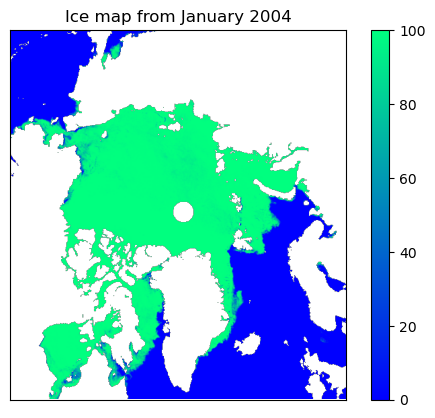

In [3]:
## Task 1

import matplotlib.pyplot as plt

data = np.load('/home/share/Project_2/ice_data/20040101.npy')  # Import data for January 2004

plt.imshow(data, cmap='winter', origin='lower',)  # Produce heat map

plt.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)
plt.colorbar()
plt.title('Ice map from January 2004')

plt.show()

### Solution to Task 2

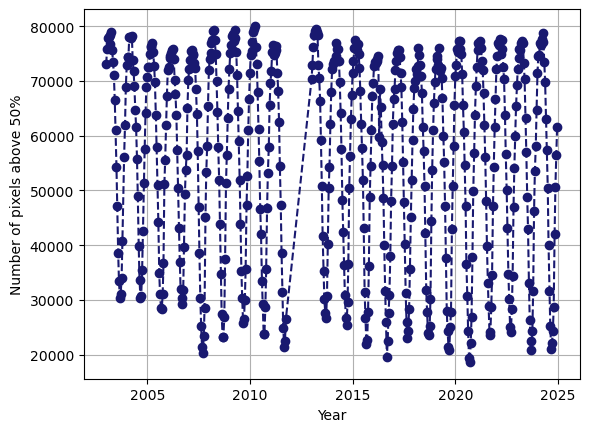

In [4]:
## Task 2

time = []  # This list will contain the times
num_pixels = []  # This list will contain the number of pixels with concentration higher than 50%


for file in filelist:
    data = np.load(file)  # Read data
    file_name = file.split('/')[-1]  # Select part of string corresponding to the file name

    year = int(file_name[:4])  # Read out year
    month = int(file_name[4:6])  # Read out month
    day = int(file_name[6:8])  # Read out day

    time += [year + ((month-1)*30 + day-1)/360]  # Append time to list of times

    num_pixels += [data[data >=50.].size]  # Append number of high concentration pixels


plt.plot(time, num_pixels, marker = 'o', color = 'midnightblue', ls ='--')  # Plot num of pixels vs time

plt.xlabel('Year')
plt.ylabel('Number of pixels above 50%')
plt.grid()

plt.show()

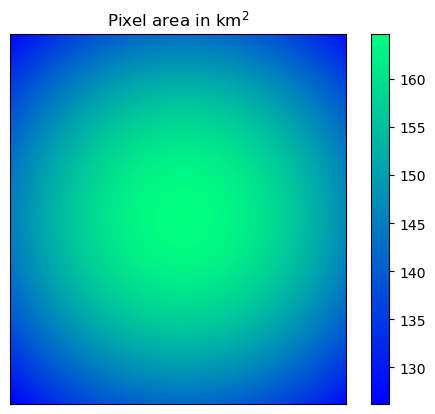

In [5]:
px_areas = np.load('/home/share/Project_2/ice_data_area.npy')  # Pixel areas stored

plt.imshow(px_areas, cmap='winter', origin='lower',)  # Produce heat map

plt.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)
plt.colorbar()
plt.title(r'Pixel area in km$^2$')

plt.show()


In [6]:
hi_areas = []  # This list will contain the total area with high concentration
total_areas = []  # This list will contain the total area of ice

for file in filelist:
    data = np.load(file)  # Read data

    mask = data >= 99.  # Define a mask for high-concentration pixels

    areas = px_areas * data/100  # Compute area of ice in each pixel

    areas_w_ice = px_areas[mask]*data[mask]/100  # Compute area of ice for high-concentration pixels
    hi_ice_area = np.sum(areas_w_ice)  # Compute area with concentration of ice
    total_area = np.nansum(areas)  # Compute total area

    hi_areas += [hi_ice_area]  # Add high concentration area to list
    total_areas += [total_area]  # Add total area to list

hi_areas = np.array(hi_areas)  # Convert to numpy array
total_areas = np.array(total_areas)


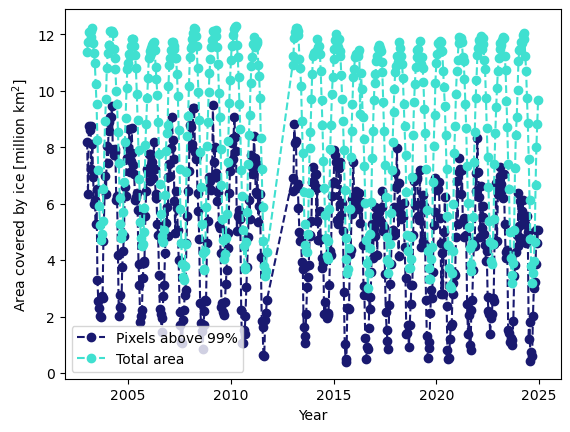

In [7]:
# fig, ax = plt.subplots(2, 1, figsize=(7, 7*np.sqrt(2)), sharex='col', layout='constrained')


# ax[0].plot(time, hi_areas/1.e+6, marker = 'o', color = 'midnightblue', ls ='--')  # Plot total area vs time
# ax[0].set(ylabel=r'Total area above 99% [million km$^2$]')

# ax[1].plot(time, total_areas/1.e+6, marker = 'o', color = 'midnightblue', ls ='--')  # Plot total area vs time
# ax[1].set(ylabel=r'Total ice area [million km$^2$]')


# fig.supxlabel('Year')



plt.plot(time, hi_areas/1.e+6, marker = 'o', color = 'midnightblue', ls ='--', label='Pixels above 99%')  # Plot total area vs time
plt.plot(time, total_areas/1.e+6, marker = 'o', color = 'turquoise', ls ='--', label='Total area')

plt.xlabel('Year')
plt.ylabel(r'Area covered by ice [million km$^2$]')
plt.legend()


plt.show()

The minimum area within a year shows a clear declining trend.

### Solution to Task 3

In [8]:
ii_min_ice = np.argmin(total_areas)
area_min_ice = total_areas[ii_min_ice]
date_min_ice = filelist[ii_min_ice].split('/')[-1].split('.')[0]

read_date = date_min_ice[-2:] + '-' + date_min_ice[4:-2] + '-' + date_min_ice[:4] 

txt = 'The minimum total area of ice was {:.4f} million km^2 recorded on ' + read_date + '.'

print(txt.format(area_min_ice/1.e+6))

The minimum total area of ice was 2.9958 million km^2 recorded on 15-09-2020.


In [9]:
data_min = np.load(filelist[ii_min_ice])

day_in_03 = '2003' + date_min_ice[4:]
data_03 = np.load(datapath + '/' + day_in_03 + '.npy')

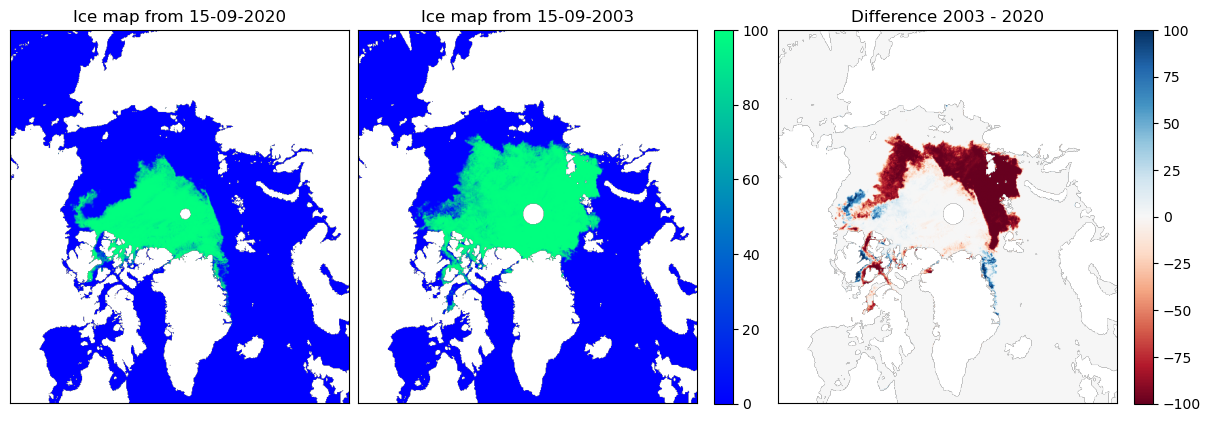

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5), layout='constrained')

title = 'Ice map from '

ax[0].imshow(data_min, cmap='winter', origin='lower')
ax[0].tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)
ax[0].title.set_text(title + read_date)

p = ax[1].imshow(data_03, cmap='winter', origin='lower')
ax[1].tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)
ax[1].title.set_text(title + read_date[:-4] + '2003')
fig.colorbar(p, ax=ax[1], shrink=0.76)

diff = ax[2].imshow(data_min - data_03, cmap='RdBu', origin='lower')
ax[2].tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)
ax[2].title.set_text('Difference 2003 - 2020')
fig.colorbar(diff, ax=ax[2], shrink=0.76)

plt.show()